# Import libraries

In [1]:
using Distributions
using LinearAlgebra
using Plots
using DataFrames
using Statistics
using Random
using Dates
using MarketData
using CSV
using StatsBase
using ScikitLearn
using SciPy

# Include jl file

In [8]:
include("DistanceMetric.jl")

crossEntropy

In [3]:
data = DataFrames.DataFrame(yahoo("AAPL", YahooOpt(period1 = DateTime(2020, 1, 1))))
x = data.AdjClose
data = DataFrames.DataFrame(yahoo("TSLA", YahooOpt(period1 = DateTime(2020, 1, 1))))
y = data.AdjClose;

# Snippet 3-1

In [4]:
bins = 10
rangeX = range(minimum(x), maximum(x), length = bins)
rangeY = range(minimum(y), maximum(y), length = bins)
cXY = fit(Histogram, (x, y),(rangeX, rangeY)).weights
hX = entropy(normalize(fit(Histogram, x, rangeX).weights, 1)) # marginal
hY = entropy(normalize(fit(Histogram, y, rangeY).weights, 1)) # marginal
iXY = mutual_info_score(cXY)
iXYn = iXY/min(hX, hY) # normalized mutual information
hXY = hX + hY - iXY # joint
hX_Y = hXY - hY # conditional
hY_X = hXY - hX; # conditional

# Snippet 3-2

In [6]:
variationsInformation(x, y, 10, norm = true)

0.6334370360409309

# Snippet 3-3

In [9]:
variationsInformationExtended(x, y, norm = true)

0.654977322772119

# Snippet 3-4 (No relationships)

In [10]:
size1 = 5000
#Random.seed!(0)
x = rand(Distributions.Normal(), size1)
e = rand(Distributions.Normal(), size1);

In [12]:
y = 0*x + e
correlation = cor(x, y)
nmi = mutualInformation(x, y, norm = true)
(correlation, nmi)

(-0.015220902711407334, 0.005292228574070103)

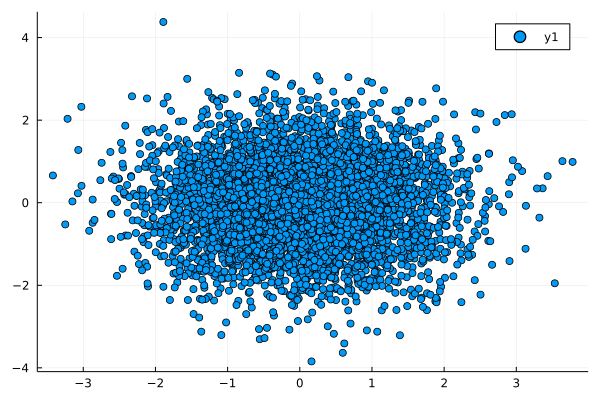

In [17]:
scatter(x, y)

# Snippet 3-4 (linear relationship)

In [13]:
y = 10000*x + e
correlation = cor(x, y)
nmi = mutualInformation(x, y, norm = true)
(correlation, nmi)

(0.9999999950439488, 0.9936394406700567)

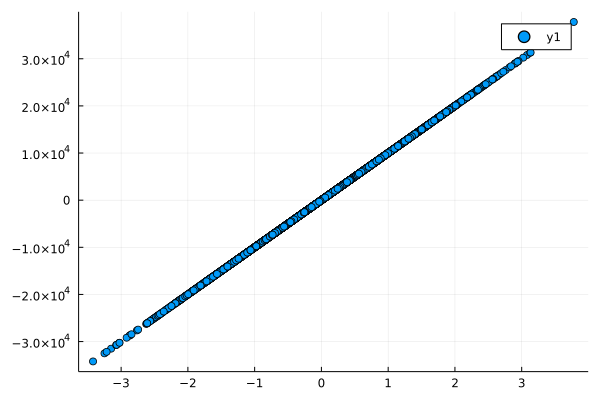

In [20]:
scatter(x, y)

# Snippet 3-4 (Nonlinear relationship)

In [14]:
y = 10000*abs.(x) + e
correlation = cor(x, y)
nmi = mutualInformation(x, y, norm = true)
(correlation, nmi)

(-0.03266895861331457, 0.5538953900167892)

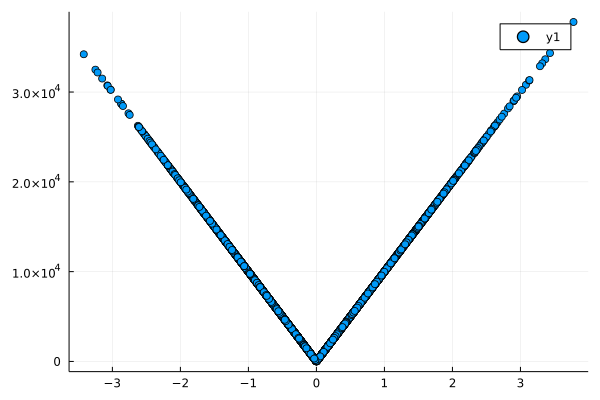

In [22]:
scatter(x, y)